# HealthCare Analytics(Patient length of stay (LOS))

### Problem Statement

Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital. 

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planni

### Objective
r.
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 

### Scope
The project will use historical data from a hospital database, and apply machine learning techniques to build and evaluate the predictive model. The project will also explore the implications of the model for hospital resource allocation and patient satisfaction.days.

### Data Description

We have train data set, train data set has both input and output variable(s).


|Column|Description|
|-------|:--------|
|case_id|	Case_ID registered in Hospital|
|Hospital_code|	Unique code for the Hospital|
|Hospital_type_code|	Unique code for the type of Hospital|
|City_Code_Hospital	|City Code of the Hospital|
|Hospital_region_code	|Region Code of the Hospital|
|Available Extra Rooms in Hospital	|Number of Extra rooms available in the Hospital|
|Department	|Department overlooking the case|
|Ward_Type|	Code for the Ward type|
|Ward_Facility_Code|	Code for the Ward Facility|
|Bed Grade|	Condition of Bed in the Ward|
|patientid|	Unique Patient Id|
|City_Code_Patient	|City Code for the patient|
|Type of Admission|	Admission Type registered by the Hospital|
|Severity of Illness|	Severity of the illness recorded at the time of admission|
|Visitors with Patient|	Number of Visitors with the patient|
|Age|	Age of the patient|
|Admission_Deposit	|Deposit at the Admission Time|
|Stay (Traget Variable)	|Stay Days by the patient|

## 1. Importing the libraries

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "C:\Users\Thor_after_infinity\Desktop\ML Datasets\HA-LOS"

C:\Users\Thor_after_infinity\Desktop\ML Datasets\HA-LOS


## 2. Read the Data

In [3]:
los=pd.read_csv('train_data.csv')

## Data Preprocessing 

In [4]:
print(los.shape)#size of the train file

(318438, 18)


In [5]:
los.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
los.isnull().sum()#chechking for missing values

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [7]:
los.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [8]:
print(los.isnull().sum())

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


In [9]:
#Handling the missing values using mode as both are categorical variables
los['Bed Grade']=los['Bed Grade'].fillna(los['Bed Grade'].mode)

In [10]:
los.City_Code_Patient=los.City_Code_Patient.fillna(los.City_Code_Patient.mode)

In [11]:
print(los.isnull().sum())

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64


In [12]:
#droping the unique identifiers case_id and patient_id
los=los.drop(['case_id','patientid'],axis=1)

## Statistical Summary of the Data

In [13]:
los.describe(include='all')

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438,318438.000000,318438,318438.000000,318438,318438,318438,318438.0,318438.0,318438,318438,318438.000000,318438,318438.000000,318438
unique,NaN,7,NaN,3,NaN,5,6,6,5.0,38.0,3,3,NaN,10,NaN,11
top,NaN,a,NaN,X,NaN,gynecology,R,F,2.0,8.0,Trauma,Moderate,NaN,41-50,NaN,21-30
freq,NaN,143425,NaN,133336,NaN,249486,127947,112753,123671.0,124011.0,152261,175843,NaN,63749,NaN,87491
mean,18.318841,NaN,4.771717,NaN,3.197627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.284099,NaN,4880.749392,NaN
std,8.633755,NaN,3.102535,NaN,1.168171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.764061,NaN,1086.776254,NaN
min,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,4186.000000,NaN
50%,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,4741.000000,NaN
75%,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,5409.000000,NaN


## Data Visulization

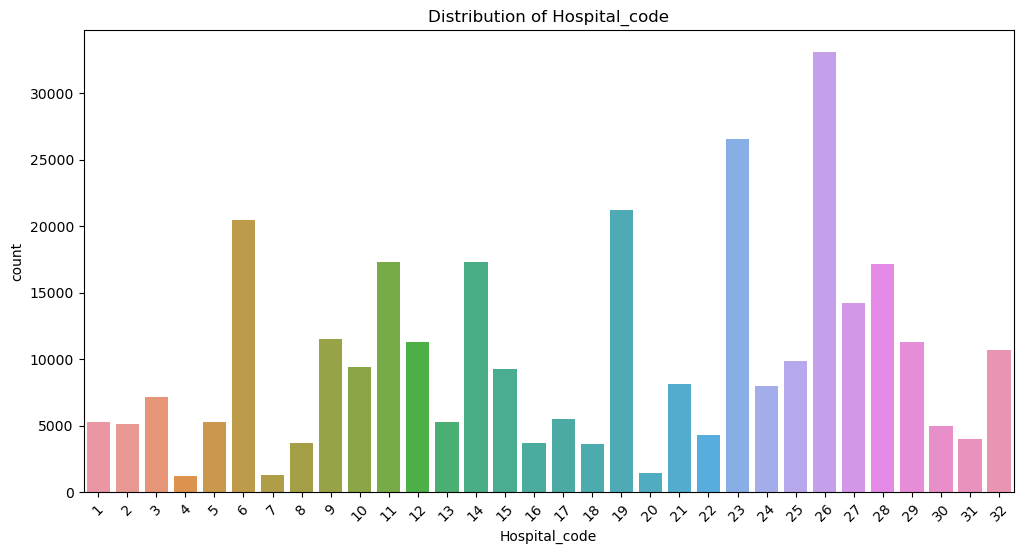

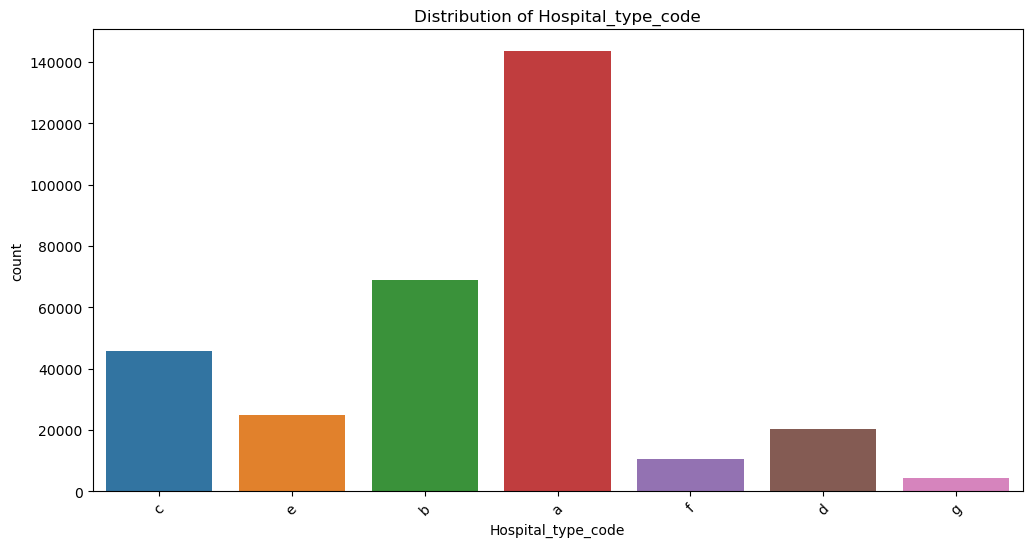

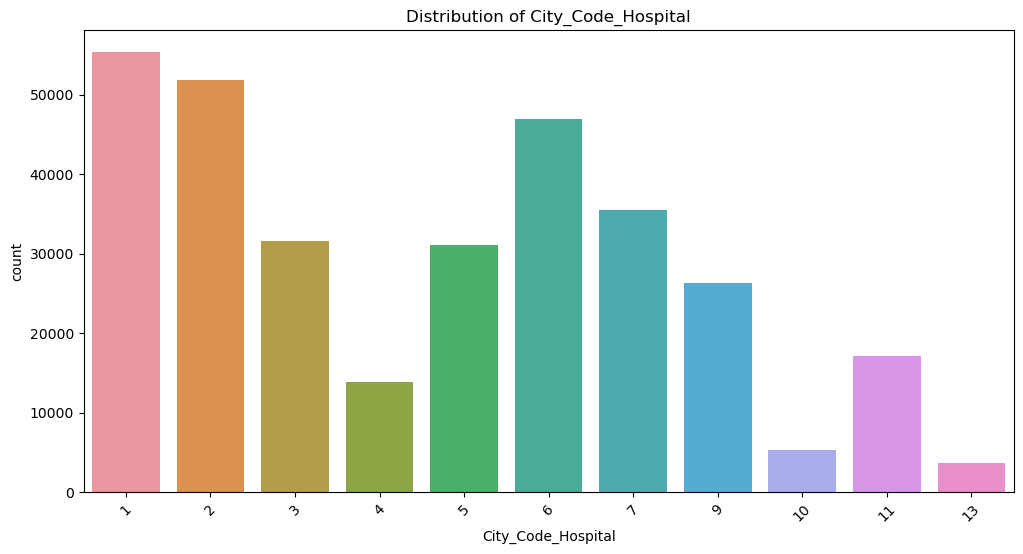

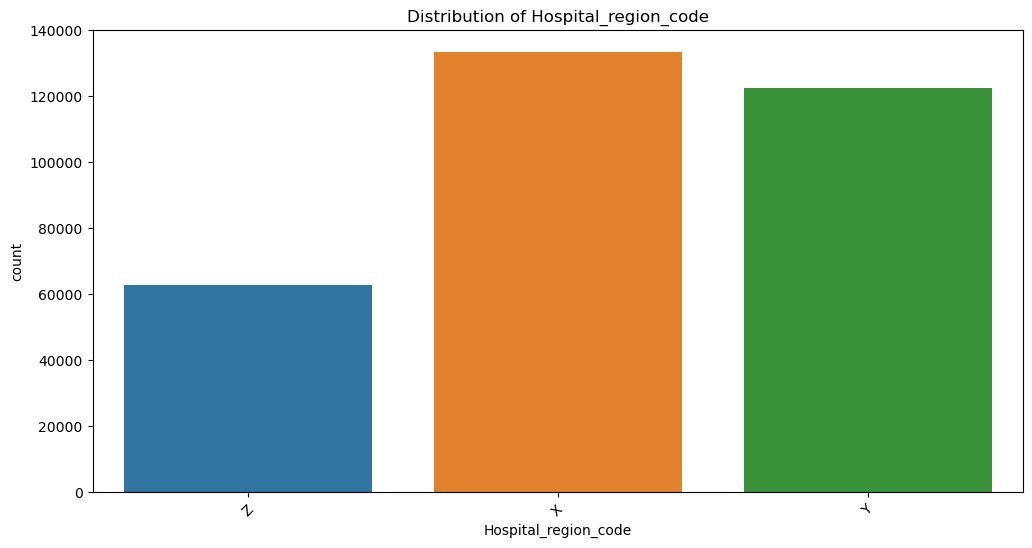

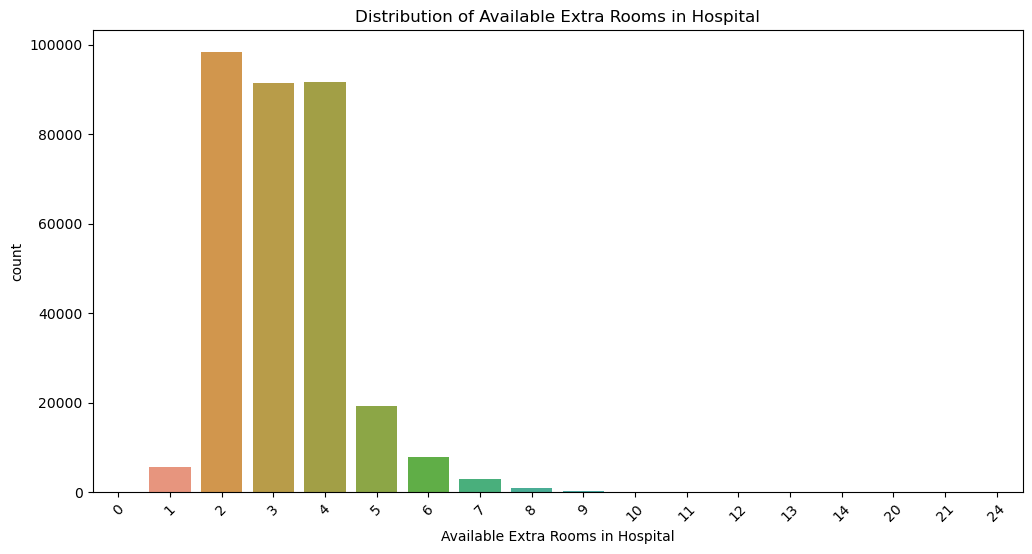

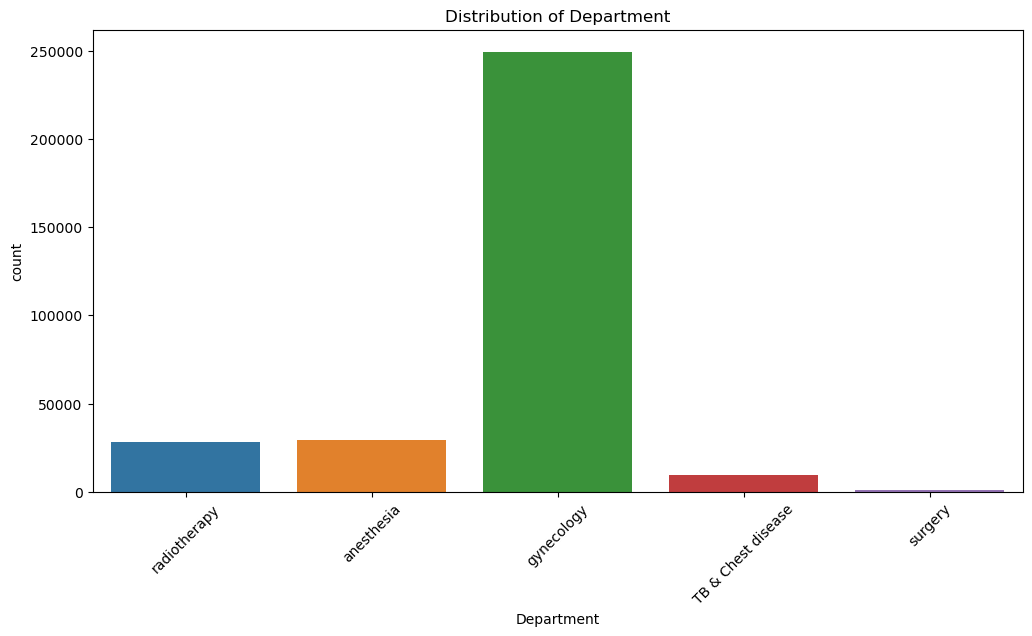

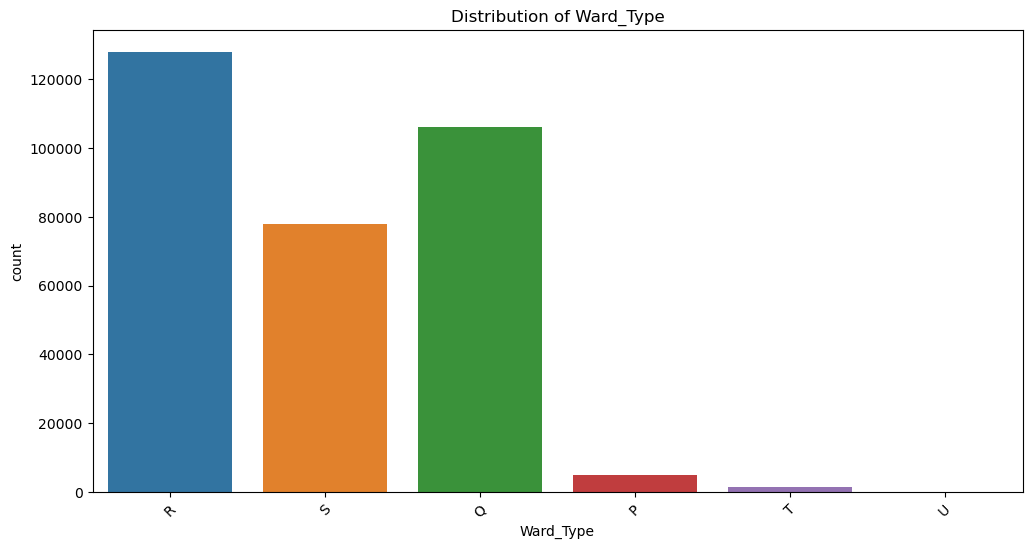

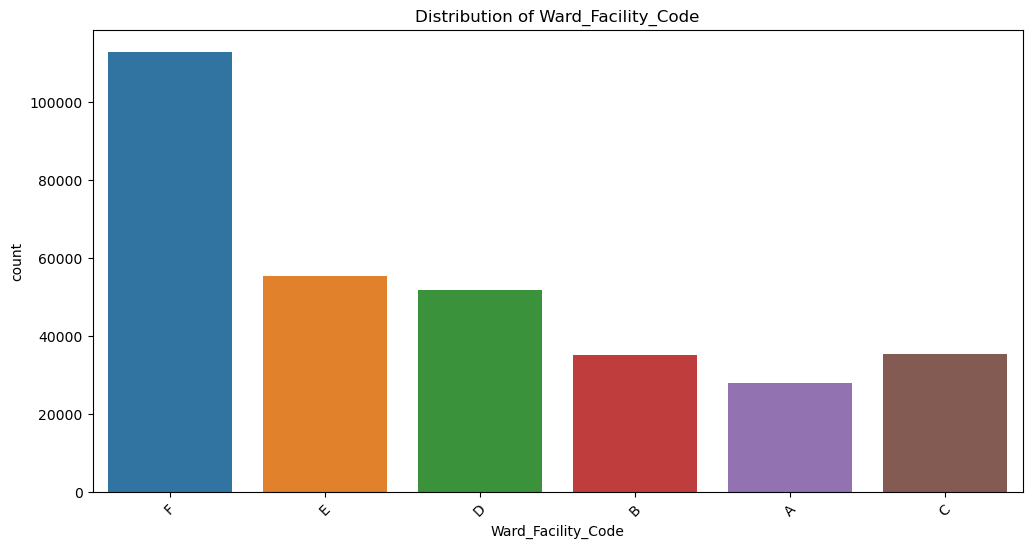

TypeError: '<' not supported between instances of 'method' and 'float'

<Figure size 1200x600 with 0 Axes>

In [14]:
# Visualize distribution of categorical variables with count plots

# Define categorical variables
categorical_variables = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code',
                         'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code',
                         'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
                         'Visitors with Patient', 'Age']

# Create count plots for each categorical variable
for col in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=los)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Stay
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: count, dtype: int64


Text(0.5, 1.0, 'Patients Lenght of Stay')

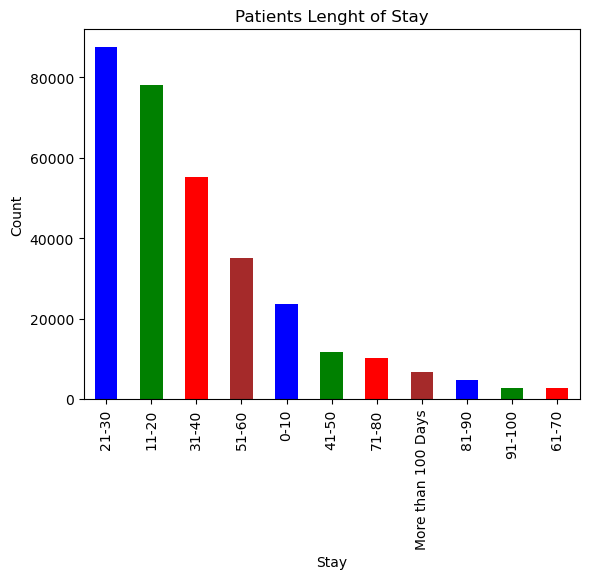

In [16]:
print(los.Stay.value_counts())
los.Stay.value_counts().plot(kind='bar', color=['blue', 'green','red','brown'])
plt.xlabel('Stay')
plt.ylabel('Count')
plt.title('Patients Lenght of Stay')

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Stay                                                                           
0-10                               791        1519       18849          2379   
11-20                             2379        8823       59690          6988   
21-30                             2618        8950       68383          7263   
31-40                             1753        4958       43535          4713   
41-50                              300         851        9671           879   
51-60                             1047        2527       27989          3256   
61-70                               76         173        2226           264   
71-80                              294         703        8165          1043   
81-90                              140         384        3748           528   
91-100                              64         156        2269           256   
More than 100 Days                 124  

<Axes: xlabel='Stay'>

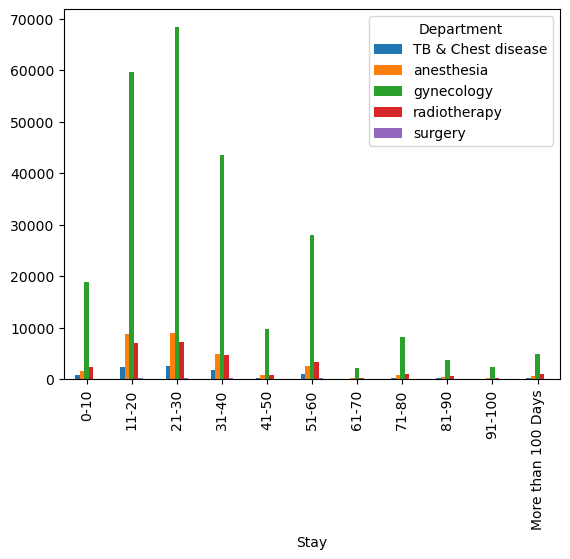

In [17]:
print(pd.crosstab(los.Stay,los.Department))
pd.crosstab(los.Stay,los.Department).plot(kind='bar')

Severity of Illness  Extreme  Minor  Moderate
Stay                                         
0-10                    3399   7866     12339
11-20                  10518  27081     40540
21-30                  15502  21535     50454
31-40                  10086  14447     30626
41-50                   2351   3000      6392
51-60                   7777   7128     20113
61-70                    647    519      1578
71-80                   2575   1928      5751
81-90                   1113    985      2740
91-100                   805    425      1535
More than 100 Days      1950    958      3775


<Axes: xlabel='Stay'>

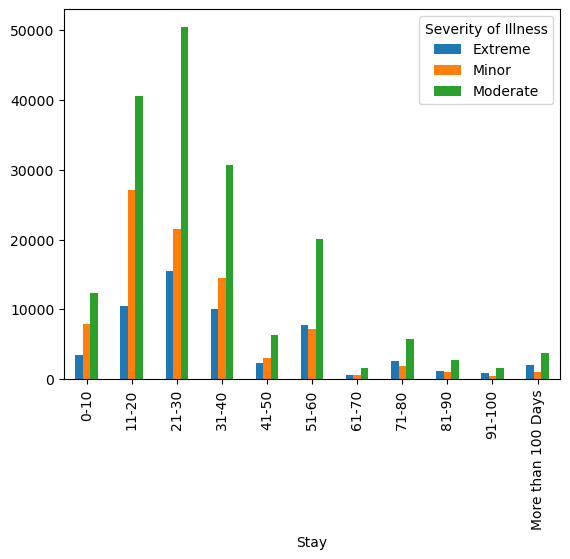

In [18]:
print(pd.crosstab(los.Stay,los['Severity of Illness']))
pd.crosstab(los.Stay,los['Severity of Illness']).plot(kind='bar')

Hospital_region_code      X      Y      Z
Stay                                     
0-10                   8145  10447   5012
11-20                 33885  29786  14468
21-30                 38768  31595  17128
31-40                 22830  21314  11015
41-50                  4405   5036   2302
51-60                 14723  13023   7272
61-70                  1012   1184    548
71-80                  4091   4069   2094
81-90                  1910   1940    988
91-100                 1147   1068    550
More than 100 Days     2420   2966   1297


<Axes: xlabel='Stay'>

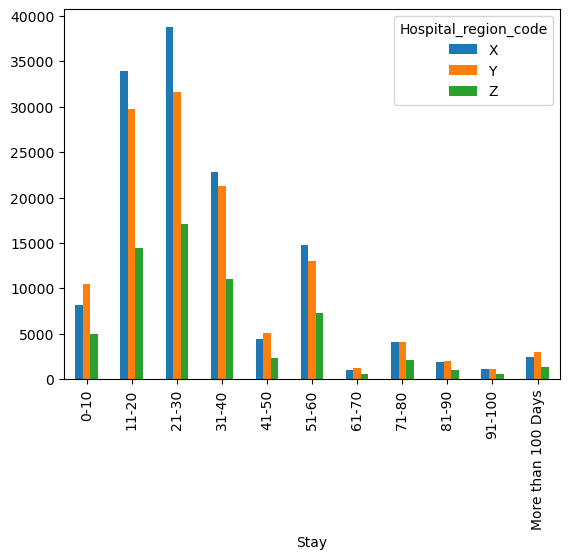

In [19]:
print(pd.crosstab(los.Stay,los.Hospital_region_code))
pd.crosstab(los.Stay,los.Hospital_region_code).plot(kind='bar')

Type of Admission   Emergency  Trauma  Urgent
Stay                                         
0-10                    14218    5328    4058
11-20                   31559   33745   12835
21-30                   27399   46244   13848
31-40                   18921   28107    8131
41-50                    4145    5968    1630
51-60                   11885   18310    4823
61-70                     976    1479     289
71-80                    3375    5551    1328
81-90                    1708    2548     582
91-100                    935    1518     312
More than 100 Days       2555    3463     665


<Axes: xlabel='Stay'>

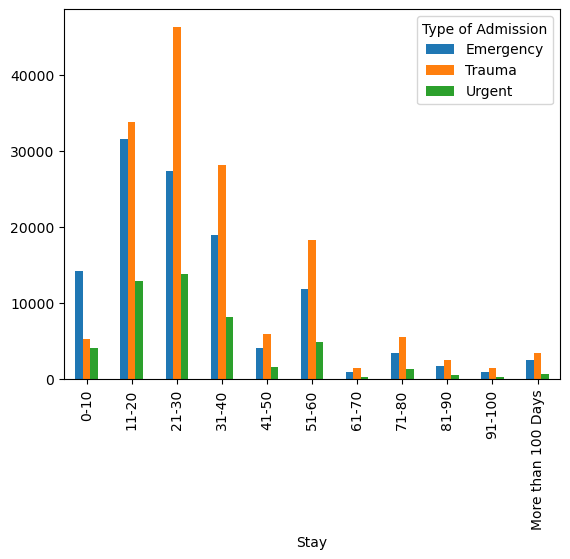

In [20]:
print(pd.crosstab(los.Stay,los['Type of Admission']))
pd.crosstab(los.Stay,los['Type of Admission']).plot(kind='bar')

## Hypothesis Testing

In [21]:
from scipy.stats import chi2_contingency

# Define the list of categorical variables (excluding the target variable 'Stay')
categorical_variables = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 
                         'Hospital_region_code', 'Department', 'Ward_Type', 
                         'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 
                         'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age']

# Perform chi-square test for each categorical variable
for col in categorical_variables:
    contingency_table = pd.crosstab(los[col], los['Stay'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi-square test for {col}:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")
    print("")

Chi-square test for Hospital_code:
Chi2 statistic: 18004.161645741166
P-value: 0.0

Chi-square test for Hospital_type_code:
Chi2 statistic: 5540.640445301696
P-value: 0.0

Chi-square test for City_Code_Hospital:
Chi2 statistic: 8477.544806136932
P-value: 0.0

Chi-square test for Hospital_region_code:
Chi2 statistic: 1216.5939805661988
P-value: 2.1072422385422048e-245

Chi-square test for Department:
Chi2 statistic: 1618.9225961803502
P-value: 0.0

Chi-square test for Ward_Type:
Chi2 statistic: 18451.43294170703
P-value: 0.0

Chi-square test for Ward_Facility_Code:
Chi2 statistic: 7507.470145092706
P-value: 0.0



TypeError: '<' not supported between instances of 'method' and 'float'

From the above calcluation and with the help of p-value, we can reject null hypothesis.

Hence Alternative hypothesis true, there is a relationship between the  stay and varibles present in the dataset.

## Label Encoding

In [22]:
X=los.drop(['Stay'],axis=1)

In [23]:
y=los.Stay

In [24]:
y

0          0-10
1         41-50
2         31-40
3         41-50
4         41-50
          ...  
318433    11-20
318434    31-40
318435    11-20
318436    11-20
318437     0-10
Name: Stay, Length: 318438, dtype: object

In [25]:
X

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,23.0,Emergency,Moderate,3,41-50,4144.0
318434,24,a,1,X,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,4,81-90,6699.0
318435,7,a,4,X,3,gynecology,R,F,4.0,10.0,Emergency,Minor,3,71-80,4235.0
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,5,11-20,3761.0


In [26]:
#label encoding
X.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit'],
      dtype='object')

In [27]:
X=pd.get_dummies(X,columns=['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code','Bed Grade',
       'City_Code_Patient','Type of Admission', 'Severity of Illness','Age'])

In [28]:
X.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,8,3,3,2,4911.0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,5,2,2,5954.0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,10,1,2,2,4745.0,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,26,2,2,2,7272.0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,26,2,2,2,5558.0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [29]:
X.replace({False:0,True:1},inplace=True)
X.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,...,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,8,3,3,2,4911.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,5,2,2,5954.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,10,1,2,2,4745.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,26,2,2,2,7272.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,26,2,2,2,5558.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# Label Encoding for y(Dependent) varible
from sklearn.preprocessing import LabelEncoder

In [31]:
y=LabelEncoder().fit_transform(y)

In [32]:
y

array([0, 4, 3, ..., 1, 1, 0])

## Building Machine Learning Models

As we seen in the above visulization our dependent variables i.e, Stay is imbalanced data, hence here we are using the somte Balance the data

In [33]:
from imblearn.over_sampling import SMOTE # importing the smote as the data is been oversampled

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (962401, 91)
Shape of y: (962401,)


In [36]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (673680, 91)
X_test  (288721, 91)
y_train  (673680,)
y_test  (288721,)


### 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logistic_regression = LogisticRegression(max_iter=1000)

In [39]:
# Fit the model
lgmodel=logistic_regression.fit(X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
lgmodel.score(X_train, y_train)

0.30485096781854887

In [41]:
# predict the values
y_pred = lgmodel.predict(X_test)

In [42]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
0,11673,3639,2806,1020,3818,913,2146,100,2,72,29
1,4517,8529,7653,2489,816,1781,255,84,106,16,94
2,3399,6197,12630,2246,592,1100,37,31,78,2,117
3,2899,3077,5559,3704,2179,5495,1280,604,712,293,567
4,4544,1377,3228,1047,8079,1311,4779,386,416,515,433
5,1170,993,1611,3251,1051,8703,2244,1412,2107,1378,2102
6,2776,537,1619,630,6995,1459,7321,624,1380,1538,1473
7,833,360,495,1369,1183,5038,4688,1538,2876,4073,3669
8,409,125,150,414,460,2382,1740,480,7997,3488,8617


In [43]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.35      0.45      0.39     26218
           1       0.34      0.32      0.33     26340
           2       0.35      0.48      0.40     26429
           3       0.22      0.14      0.17     26369
           4       0.30      0.31      0.30     26115
           5       0.26      0.33      0.29     26022
           6       0.23      0.28      0.25     26352
           7       0.22      0.06      0.09     26122
           8       0.34      0.30      0.32     26262
           9       0.26      0.19      0.22     26227
          10       0.37      0.51      0.43     26265

    accuracy                           0.31    288721
   macro avg       0.29      0.31      0.29    288721
weighted avg       0.29      0.31      0.29    288721



### 2. RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfmodel=random_forest.fit(X_train, y_train)

In [46]:
rfmodel.score(X_train, y_train)

0.3947408265051657

In [47]:
# predict the values
y_pred = rfmodel.predict(X_test)

In [48]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
0,12666,3580,2794,32,3595,219,2992,46,39,247,8
1,2504,11687,9155,618,724,1232,250,36,52,32,50
2,1153,8067,16171,227,121,490,3,15,92,0,90
3,2349,3449,6947,2738,2491,5560,1178,382,521,504,250
4,3463,1145,2889,164,8573,785,6767,287,669,1098,275
5,1453,1031,1797,1708,1180,10283,1324,1339,2787,2112,1008
6,2352,303,837,97,4913,589,10684,514,2542,2576,945
7,1064,316,452,502,1098,4903,2614,2038,4610,6252,2273
8,429,71,95,143,249,1853,1045,387,15866,2264,3860


In [49]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.45      0.48      0.46     26218
           1       0.39      0.44      0.42     26340
           2       0.39      0.61      0.48     26429
           3       0.42      0.10      0.17     26369
           4       0.35      0.33      0.34     26115
           5       0.35      0.40      0.37     26022
           6       0.34      0.41      0.37     26352
           7       0.31      0.08      0.12     26122
           8       0.40      0.60      0.48     26262
           9       0.33      0.33      0.33     26227
          10       0.49      0.46      0.47     26265

    accuracy                           0.39    288721
   macro avg       0.38      0.39      0.36    288721
weighted avg       0.38      0.39      0.36    288721



### 3. GMB

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm=gradient_boosting.fit(X_train, y_train)

In [52]:
gbm.score(X_train,y_train)

0.4020425127657048

In [53]:
# predict the values
y_pred = gbm.predict(X_test)

In [54]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
0,14275,3439,2276,352,3632,81,1980,73,8,102,0
1,2610,12052,8231,1119,760,1224,185,59,45,31,24
2,1096,8600,15570,570,33,342,3,7,128,5,75
3,2325,3349,6089,3130,2750,5948,804,879,477,453,165
4,4130,968,2257,562,9355,754,5637,740,491,1079,142
5,1370,902,1398,2055,1198,10202,959,2617,2870,1753,698
6,2582,208,535,333,5222,695,10299,1469,1812,2609,588
7,1119,251,303,755,1165,4875,1841,4818,3755,5508,1732
8,602,69,52,165,310,1439,936,1391,15874,2296,3128


In [55]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.45      0.54      0.49     26218
           1       0.40      0.46      0.43     26340
           2       0.42      0.59      0.49     26429
           3       0.33      0.12      0.17     26369
           4       0.36      0.36      0.36     26115
           5       0.35      0.39      0.37     26022
           6       0.39      0.39      0.39     26352
           7       0.28      0.18      0.22     26122
           8       0.43      0.60      0.51     26262
           9       0.35      0.33      0.34     26227
          10       0.54      0.44      0.48     26265

    accuracy                           0.40    288721
   macro avg       0.39      0.40      0.39    288721
weighted avg       0.39      0.40      0.39    288721



### 4. XGBoost

In [56]:
from xgboost import XGBClassifier

In [58]:
X_train.columns = [str(col).replace('[','').replace(']','').replace('<', '_less_than_') for col in X_train.columns]
X_test.columns = [str(col).replace('[','').replace(']','').replace('<', '_less_than_') for col in X_test.columns]

In [59]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgbmodel=xgb.fit(X_train, y_train)

In [60]:
xgbmodel.score(X_train,y_train)

0.3859250682816768

In [62]:
# predict the values
y_pred = xgbmodel.predict(X_test)

In [63]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
0,14710,3566,2219,216,3289,81,1928,81,3,125,0
1,3057,12255,7885,737,766,1237,165,83,96,37,22
2,1429,8915,15170,289,51,333,1,3,158,4,76
3,2639,3693,6003,2356,2593,6102,738,895,697,470,183
4,4832,1192,2272,407,8359,743,5592,836,558,1152,172
5,1573,994,1451,1720,1159,9985,753,2439,3297,1826,825
6,3264,302,604,238,4969,683,9103,1850,2086,2517,736
7,1352,312,319,650,1165,4944,1522,4297,4194,5379,1988
8,671,86,61,153,306,1329,657,1273,16015,1974,3737


In [64]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.42      0.56      0.48     26218
           1       0.39      0.47      0.42     26340
           2       0.42      0.57      0.48     26429
           3       0.33      0.09      0.14     26369
           4       0.35      0.32      0.33     26115
           5       0.34      0.38      0.36     26022
           6       0.39      0.35      0.37     26352
           7       0.26      0.16      0.20     26122
           8       0.41      0.61      0.49     26262
           9       0.32      0.28      0.30     26227
          10       0.51      0.46      0.48     26265

    accuracy                           0.39    288721
   macro avg       0.38      0.39      0.37    288721
weighted avg       0.38      0.39      0.37    288721



### 5. Catboost

In [65]:
from catboost import CatBoostClassifier

In [66]:
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.1, loss_function='MultiClass', verbose=100)
catmodel=catboost.fit(X_train, y_train)

0:	learn: 2.3066958	total: 671ms	remaining: 11m 10s
100:	learn: 1.6206776	total: 51.8s	remaining: 7m 40s
200:	learn: 1.5656660	total: 1m 43s	remaining: 6m 51s
300:	learn: 1.5329810	total: 2m 34s	remaining: 5m 59s
400:	learn: 1.5105620	total: 3m 26s	remaining: 5m 8s
500:	learn: 1.4924311	total: 4m 18s	remaining: 4m 17s
600:	learn: 1.4764863	total: 5m 10s	remaining: 3m 26s
700:	learn: 1.4621260	total: 6m 2s	remaining: 2m 34s
800:	learn: 1.4492084	total: 6m 54s	remaining: 1m 42s
900:	learn: 1.4373225	total: 7m 46s	remaining: 51.3s
999:	learn: 1.4271751	total: 8m 37s	remaining: 0us


In [67]:
catmodel.score(X_train,y_train)

0.47669813561334756

In [68]:
# predict the values
y_pred = catmodel.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.52      0.57      0.54     26218
           1       0.43      0.47      0.45     26340
           2       0.43      0.64      0.51     26429
           3       0.40      0.17      0.24     26369
           4       0.42      0.42      0.42     26115
           5       0.39      0.40      0.40     26022
           6       0.49      0.53      0.51     26352
           7       0.38      0.26      0.31     26122
           8       0.50      0.63      0.56     26262
           9       0.47      0.49      0.48     26227
          10       0.60      0.49      0.54     26265

    accuracy                           0.46    288721
   macro avg       0.46      0.46      0.45    288721
weighted avg       0.46      0.46      0.45    288721



### 6. Navie Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
naive_bayes = GaussianNB()
navmodel=naive_bayes.fit(X_train, y_train)

In [93]:
navmodel.score(X_train,y_train)

0.20866286664291653

In [94]:
# predict the values
y_pred = catmodel.predict(X_test)

In [95]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.52      0.57      0.54     26218
           1       0.43      0.47      0.45     26340
           2       0.43      0.64      0.51     26429
           3       0.40      0.17      0.24     26369
           4       0.42      0.42      0.42     26115
           5       0.39      0.40      0.40     26022
           6       0.49      0.53      0.51     26352
           7       0.38      0.26      0.31     26122
           8       0.50      0.63      0.56     26262
           9       0.47      0.49      0.48     26227
          10       0.60      0.49      0.54     26265

    accuracy                           0.46    288721
   macro avg       0.46      0.46      0.45    288721
weighted avg       0.46      0.46      0.45    288721



### 7. Fully Connected Layer

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [76]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11776     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 11)                715       
                                                                 
Total params: 20747 (81.04 KB)
Trainable params: 20747 (81.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10


10527/10527 [==============================] - 21s 2ms/step - loss: 4.5789 - accuracy: 0.0907 - val_loss: 2.3980 - val_accuracy: 0.0905
Epoch 2/10
10527/10527 [==============================] - 19s 2ms/step - loss: 2.4000 - accuracy: 0.0907 - val_loss: 2.3980 - val_accuracy: 0.0912
Epoch 3/10
10527/10527 [==============================] - 20s 2ms/step - loss: 2.3991 - accuracy: 0.0902 - val_loss: 2.3979 - val_accuracy: 0.0913
Epoch 4/10
10527/10527 [==============================] - 19s 2ms/step - loss: 2.3982 - accuracy: 0.0909 - val_loss: 2.3979 - val_accuracy: 0.0905
Epoch 5/10
10527/10527 [==============================] - 19s 2ms/step - loss: 2.3985 - accuracy: 0.0911 - val_loss: 2.3980 - val_accuracy: 0.0905
Epoch 6/10
10527/10527 [==============================] - 19s 2ms/step - loss: 2.3982 - accuracy: 0.0906 - val_loss: 2.3981 - val_accuracy: 0.0910
Epoch 7/10
10527/10527 [==============================] - 19s 2ms/step - loss: 2.3982 - accuracy: 0.0905 - val_loss:

In [79]:
# Evaluate the model
y_pred_nn_probabilities = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn_probabilities, axis=1)

9023/9023 [==============================] - 7s 800us/step


In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Fully Connected Neural Network Accuracy:", accuracy)

Fully Connected Neural Network Accuracy: 0.0915381982922554


### 8. CNN

In [82]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

In [84]:
import numpy as np

# Convert DataFrame to NumPy array
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 89, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 44, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 42, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 21, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 672)               0         
                                                                 
 dense_3 (Dense)             (None, 64)              

In [85]:
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test), verbose=1)

Epoch 1/10
10527/10527 [==============================] - 52s 5ms/step - loss: 2.5094 - accuracy: 0.0910 - val_loss: 2.3980 - val_accuracy: 0.0908
Epoch 2/10
10527/10527 [==============================] - 50s 5ms/step - loss: 2.3980 - accuracy: 0.0907 - val_loss: 2.3979 - val_accuracy: 0.0910
Epoch 3/10
10527/10527 [==============================] - 49s 5ms/step - loss: 2.3980 - accuracy: 0.0902 - val_loss: 2.3980 - val_accuracy: 0.0913
Epoch 4/10
10527/10527 [==============================] - 51s 5ms/step - loss: 2.3980 - accuracy: 0.0903 - val_loss: 2.3980 - val_accuracy: 0.0905
Epoch 5/10
10527/10527 [==============================] - 62s 6ms/step - loss: 2.3980 - accuracy: 0.0918 - val_loss: 2.3979 - val_accuracy: 0.0910
Epoch 6/10
10527/10527 [==============================] - 53s 5ms/step - loss: 2.3980 - accuracy: 0.0906 - val_loss: 2.3980 - val_accuracy: 0.0908
Epoch 7/10
10527/10527 [==============================] - 56s 5ms/step - loss: 2.3980 - accuracy: 0.0907 - val_loss: 2

In [86]:
# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print("CNN Accuracy:", accuracy)

CNN Accuracy: 0.09012853354215622


In [87]:
y_pred_cnn_probabilities = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_probabilities, axis=1)

9023/9023 [==============================] - 15s 2ms/step


In [88]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn))


Classification Report:


D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     26218
           1       0.00      0.00      0.00     26340
           2       0.00      0.00      0.00     26429
           3       0.00      0.00      0.00     26369
           4       0.00      0.00      0.00     26115
           5       0.09      1.00      0.17     26022
           6       0.00      0.00      0.00     26352
           7       0.00      0.00      0.00     26122
           8       0.00      0.00      0.00     26262
           9       0.00      0.00      0.00     26227
          10       0.00      0.00      0.00     26265

    accuracy                           0.09    288721
   macro avg       0.01      0.09      0.02    288721
weighted avg       0.01      0.09      0.01    288721



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print("CNN Accuracy:", accuracy)

CNN Accuracy: 0.09012853354215622


## Summary

The HealthCare Analytics(Patient length of stay (LOS)) dataset was analyzed using various machine learning models, and the results are summarized below. The table shows the performance of each model on four different metrics: ML model scores, and F1 scores.

| Model | ML model Score | F1 Score|
|:------|:--------------:|:-------------:|
|Logistic Regression|0.30485096781854887|0.31|
|Random Forest|0.3947408265051657|0.39|
|Gradient boosting machines|0.4020425127657048|0.40|
|XGBoost|0.3859250682816768|0.39|
|Catboost|0.47669813561334756|0.46|
|Gaussian Naive Bayes|0.20866286664291653|0.46|
|Fully Connected Layer(ANN)|0.09012853354215622|0.09|
|Convolutional Neural Network|0.09012853354215622|0.09|

From the results, we can observe the following:

    1. Catboost performed the best among all models, with the highest ML model score and a competitive F1 score.

    2. Gaussian Naive Bayes had a relatively low ML model score compared to other models, but its F1 score was competitive, indicating a trade-off between accuracy and precision-recall balance.

    3. Fully Connected Layer (ANN) and Convolutional Neural Network had the lowest ML model scores and F1 scores, suggesting that these models may not be suitable for this particular dataset or may require further tuning.

In conclusion, Catboost appears to be the most effective model for predicting patient length of stay in this dataset, achieving the highest ML model score. However, the choice of the best model ultimately depends on the specific requirements and objectives of the task, considering factors such as interpretability, computational efficiency, and the importance of precision-recall balance. Further experimentation and fine-tuning of the models may be necessary to improve performance and identify the most suitable model for the given task.